In [1]:
# The Steam Store Games dataset, found on Kaggle, offers information about various games that are listed on Steam. 
# This dataset includes attributes such as the name of the game, its release date, price, genres, platforms, developers, 
# publishers, and ratings. This comprehensive data allows users to conduct a detailed analysis, such as looking at statistics and trends. 
# For instance, you can explore price trends, genre popularity, or platform availability. This resource is valuable for anyone 
# interested in understanding market dynamics in the video game industry. So, how have the prices of games on Steam evolved over time, and 
# what factors influence these changes? To answer this, we are going to look at What are the trends in game prices over the years; how do game 
# prices vary across different genres; and what is the impact of game ratings on their prices?
# https://github.com/nj00076/ProjectFinalDraft

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
df = pd.read_csv('steam.csv')
df.head(10)

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99
5,60,Ricochet,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Valve Anti-Ch...,Action,Action;FPS;Multiplayer,0,2758,684,175,10,5000000-10000000,3.99
6,70,Half-Life,1998-11-08,1,Valve,Valve,windows;mac;linux,0,Single-player;Multi-player;Online Multi-Player...,Action,FPS;Classic;Action,0,27755,1100,1300,83,5000000-10000000,7.19
7,80,Counter-Strike: Condition Zero,2004-03-01,1,Valve,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,Action;FPS;Multiplayer,0,12120,1439,427,43,10000000-20000000,7.19
8,130,Half-Life: Blue Shift,2001-06-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player,Action,FPS;Action;Sci-fi,0,3822,420,361,205,5000000-10000000,3.99
9,220,Half-Life 2,2004-11-16,1,Valve,Valve,windows;mac;linux,0,Single-player;Steam Achievements;Steam Trading...,Action,FPS;Action;Sci-fi,33,67902,2419,691,402,10000000-20000000,7.19


In [5]:
#DATA CLEANING

In [6]:
#Drop any unwanted features if necessary
dfcleaned = df[df['english'] == 1]
dfcleaned = dfcleaned.loc[:, ['name','release_date','developer','publisher','genres','positive_ratings','negative_ratings','average_playtime','owners','price']]

In [7]:
#Check if there are any missing values and address them
dfcleaned = dfcleaned.dropna()

In [8]:
#Check if any duplicates and address them
duplicates = dfcleaned.duplicated()
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


In [9]:
#Check the data type of each column and correct them if any
print("Data types of each column:")
dfcleaned['release_date'] = pd.to_datetime(df['release_date'], format='%Y-%m-%d', errors='coerce')
print(dfcleaned.dtypes)

Data types of each column:
name                        object
release_date        datetime64[ns]
developer                   object
publisher                   object
genres                      object
positive_ratings             int64
negative_ratings             int64
average_playtime             int64
owners                      object
price                      float64
dtype: object


In [10]:
#For categorical variables, check if there are any inconsistent inputs and address them
unique_values = dfcleaned['name'].unique()

In [19]:
unique_values = dfcleaned['developer'].unique()

In [21]:
unique_values = dfcleaned['publisher'].unique()

In [316]:
#For numeric variables, check any outliers and remove them or replace them with a certain value
q1 = dfcleaned['price'].quantile(0.01)
q3 = dfcleaned['price'].quantile(0.99)
IQR = q3 - q1
lower = q1 - 1.5 * IQR
upper = q3 + 1.5 * IQR
outliers = dfcleaned[(dfcleaned['price'] < lower) | (dfcleaned['price'] > upper)]
print("\nOutliers based on IQR:")
print(outliers)
dfcleaned = dfcleaned[(dfcleaned['price'] >= lower) & (dfcleaned['price'] <= upper)]


Outliers based on IQR:
                                name release_date                developer  \
1102                      3DCoat 4.8   2012-10-02                  Pilgway   
7696                  The Music Room   2017-08-17              Chroma Coda   
7992   3DF Zephyr Lite Steam Edition   2016-02-02               3Dflow SRL   
10034                  Houdini Indie   2018-10-10                   SideFX   
10624    Tactics: Bludgeons Blessing   2017-07-04         Capt. McCay Soft   
10910                     Silhouette   2016-11-13          Apeirogon Games   
13061         GameMaker Studio 2 Web   2017-03-08          YoYo Games Ltd.   
13062         GameMaker Studio 2 UWP   2017-03-08          YoYo Games Ltd.   
13063      GameMaker Studio 2 Mobile   2017-03-08          YoYo Games Ltd.   
14917                 CrisisActionVR   2017-09-11             Pixel Wonder   
17126                 Tactics 2: War   2017-09-22          Capt McCay Soft   
21105             ADR-Labelling Game   2

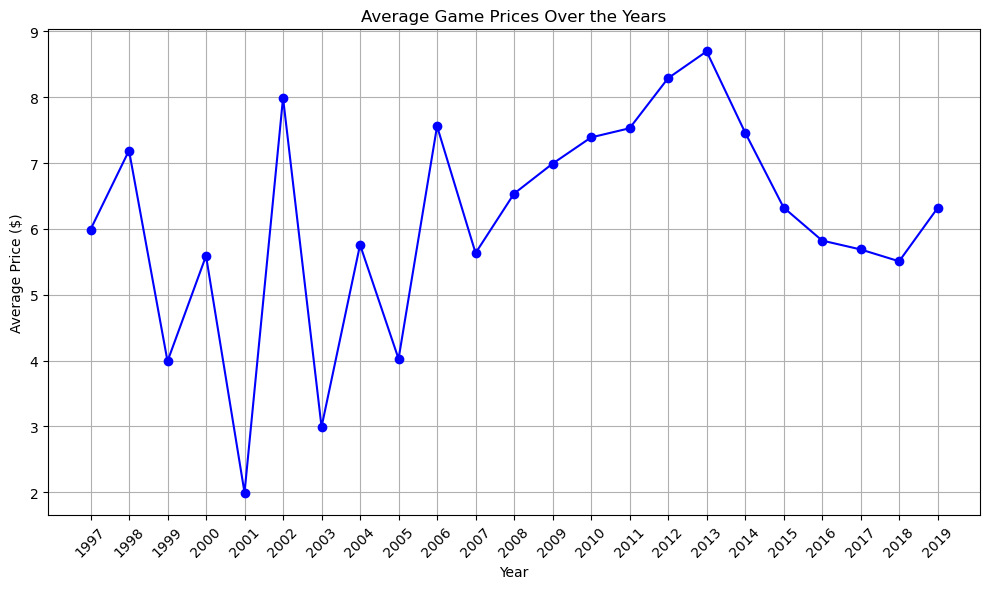

In [318]:
#Process the data. Use a pivot table or other functions to generate the result you want (What are the trends in game prices over the years)
dfgraph = dfcleaned
dfgraph['release_date'] = dfcleaned['release_date'].dt.year
price_trends = dfcleaned.groupby('release_date')['price'].mean().reset_index()

#Create a graph to visualize the result
plt.figure(figsize=(10, 6))
plt.plot(price_trends['release_date'], price_trends['price'], marker='o', linestyle='-', color='b')
plt.title('Average Game Prices Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Price ($)')
plt.grid(True)
plt.xticks(price_trends['release_date'], rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#Interpret the result. Explain your findings

# The graph shows that the average price of games on Steam has changed sparatically over the years. Overall, the average prices of games has no changed
# in any significant way. However, there are two periodic trends that can be seen in in this graph. Between the years of 2007 and 2013, the average price
# of games on steam was increasing steadily. This is due to the rise of gaming and when games like portal and Team Fortress 2 were released. The second
# trend is between the years of 2013 and 2018 where the average price followed the opposite path wher it decreased steadily. In totality, this graph 
# shows that time has no significant affect on the average price of games.

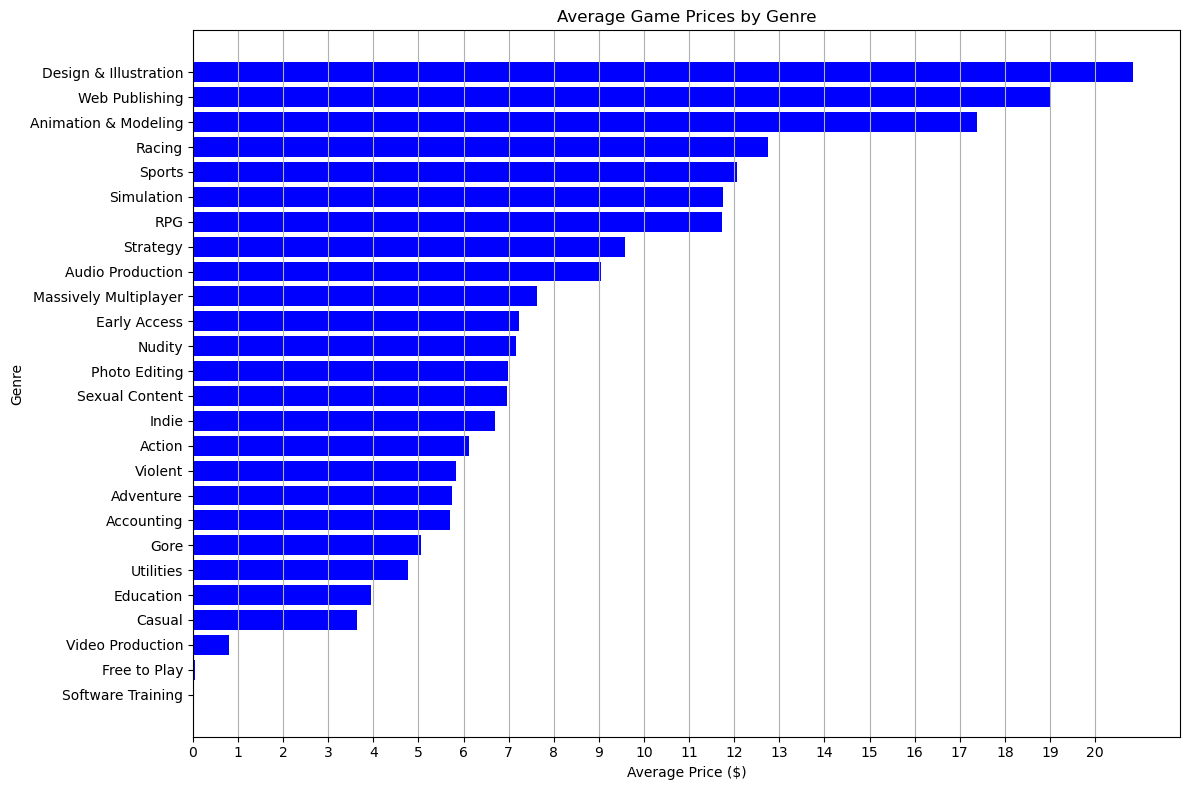

In [288]:
#Process the data. Use a pivot table or other functions to generate the result you want (how do game prices vary across different genres)
split_genres = dfcleaned["genres"].str.split(";", n=2, expand=True)
genre_df= pd.concat([dfcleaned, split_genres], axis=1)
genre_prices = genre_df.groupby(genre_df[0])['price'].mean().reset_index()
genre_prices = genre_prices.sort_values(by='price')

#Create a graph to visualize the result
plt.figure(figsize=(12, 8))
plt.barh(genre_prices[0], genre_prices['price'], color='b')
plt.title('Average Game Prices by Genre')
plt.xlabel('Average Price ($)')
plt.ylabel('Genre')
plt.grid(axis='x')
min_price = genre_prices['price'].min()
max_price = genre_prices['price'].max()
plt.xticks(np.arange(int(min_price), int(max_price) + 1, 1))
plt.tight_layout()
plt.show()

In [ ]:
#Interpret the result. Explain your findings

# The graph shows that the average price of games on Steam by category is seemingly random. However, there is one trend that can be seen within this 
# graph involving softwares. Generally, production and simulation applications (games) are going to be more expensive than your everyday action or
# adventure games. This could be because production and simulation applications (games) are used for professional or educational purposes, such as 
# training simulations or design tools. These applications often target a niche market where users are willing to pay a premium for high-quality and 
# specialized features. In totality, this graph between categories games generally have the same average price with exception to production and 
# simulation applications (games)

C:\Users\local_nj00076\Temp\ipykernel_1948\3480319971.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfgraph['average_rating'].fillna(0, inplace=True)


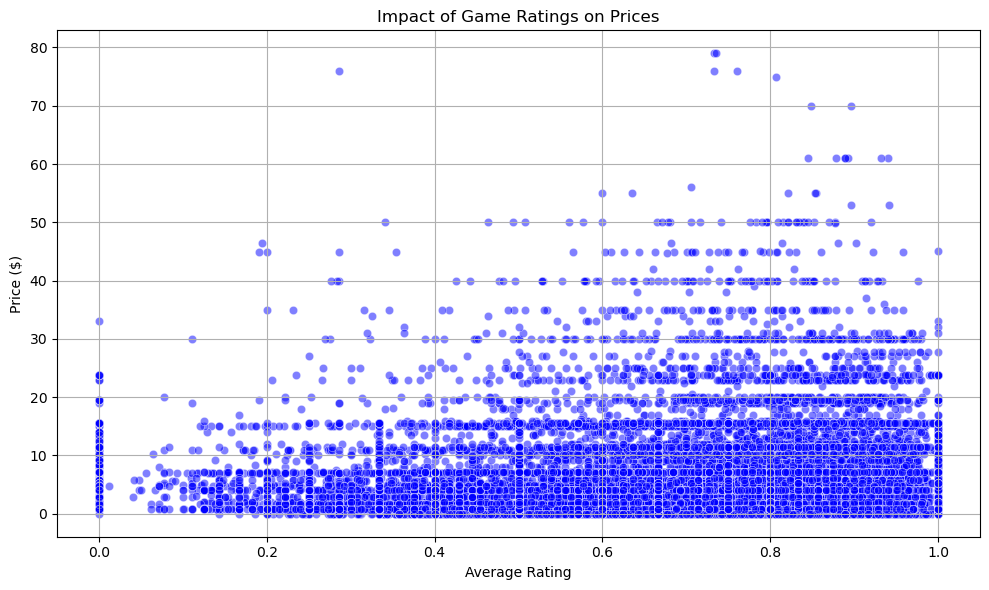

In [289]:
#Process the data. Use a pivot table or other functions to generate the result you want (what is the impact of game ratings on their prices)
dfgraph = dfcleaned
dfgraph['positive_ratings'] = pd.to_numeric(dfgraph['positive_ratings'], errors='coerce')
dfgraph['negative_ratings'] = pd.to_numeric(dfgraph['negative_ratings'], errors='coerce')
dfgraph['total_ratings'] = dfgraph['positive_ratings'] + dfgraph['negative_ratings']
dfgraph['average_rating'] = dfgraph['positive_ratings'] / dfgraph['total_ratings']
dfgraph['average_rating'].fillna(0, inplace=True)

#Create a graph to visualize the result
plt.figure(figsize=(10, 6))
plt.scatter(dfgraph['average_rating'], dfgraph['price'], alpha=0.5, color='b', edgecolors='w', linewidth=0.5)
plt.title('Impact of Game Ratings on Prices')
plt.xlabel('Average Rating')
plt.ylabel('Price ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [292]:
#Interpret the result. Explain your findings

# The graph shows that the average price of games on Steam is seemingly random woth some linear positive groth. Overall, the average rating of games 
# has no significant affect on average price. However, there are one trends that can be seen in in this graph. This scatter plot shows a slight increase
# in price where the rating is highest. This is seen by the tighter grouping with increaded height nearing the end of the scatter plot. Overall, the
# the scatter plot shows that there is a corolation between average rating and average price. Furthermore, the r3elationship of wether price is reactive
# to the rating or if the rating is reactive to the price. Even so, it is clear that there is some type of relationship between the two.

In [1]:
#Summarize the main findings from this project as well as what you failed to find from the results

# The evolution of game prices on Steam reveals an image or representation of stability with occasional fluctuations. Over time, the price of games 
# has relativwly remained steady, although there have been periods of significant change. Specifically, from 2007 to 2013, the average price of games 
# increased steadily, most likely due to the popularity of gaming and the release of certain titles like portal. However, from 2013 to 2018, the average 
# price saw a mirrored decline. This small pattern could be because of factors such as increased competition, more frequent sales and discounts, or 
# shifts in consumer wants and needs. Overall no continuing patter could be found liinking time and pricing of games which is the same for examining 
# how game prices vary across different genres. More small patterns could be found like simulation and production applications typically command higher 
# average prices. Hoever this is m,ost likely due to the specialized nature of these applications, which are used for professional or educational 
# purposes. The only consistant pattern found was that more higher-rated games often fetch higher prices due to their perceived quality and popularity. 
# On the contrary, games with lower ratings may be priced lower to attract buyers or reflect lesser perceived value. So to answer the question, how have 
# the prices of games on Steam evolved over time, and what factors influence these changes? The average prices have fluctuated but have always returned to
# their point of origin. The only factor that seems to influence this change is the popularity based on reviews of the games released at the time.